# GRIP - Task 2 - Linear Regression 
## By Bhaskar B Sarkar

#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
%matplotlib inline

#### To import data and look at top 5 values

In [3]:
student_df = pd.read_csv('student_scores.csv')
student_df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### To get to know about number of rows, coloumns, the values in rows and it's type. 

In [4]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### 1. This method shows the different mathematical measures
#### 2. It can be observed here that the can be seen a relation between 'Hours' & 'Scores'. The values are nearly proportional. 

In [5]:
student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### We can plot a scatter plot to see how the labels are distributed with respect to features. 


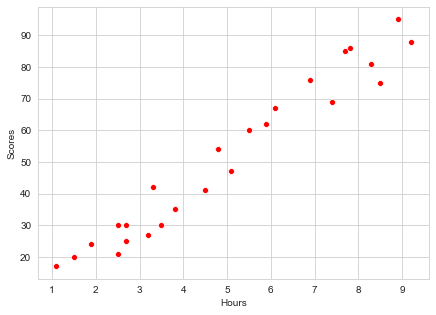

In [6]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.scatterplot(x = 'Hours', y = 'Scores', data = student_df, color='red' )

#### Since, the values are scattered in a linear pattern we can see if the data can be compared with a linear line


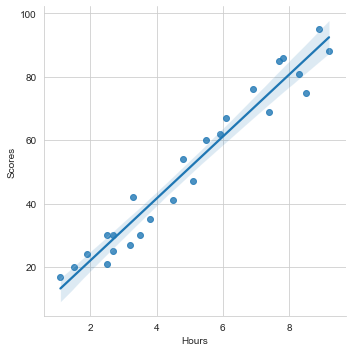

In [7]:
sns.set_style("whitegrid")
sns.lmplot(x = 'Hours', y = 'Scores', data = student_df)

#### Now, it's time to train the model using Linear Regression. Let's split data into training and testing data.



In [8]:
#Creating feature and label data
X, Y = student_df.iloc[:, :-1], student_df['Scores']

#Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [9]:
#Creating linear regression model
linear_regression = LinearRegression()

In [10]:
#Training model
linear_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
m = linear_regression.coef_
c = linear_regression.intercept_

In [12]:
y = m*X + c

#### Let's plot the line which our model gave us and compare it with the data

Text(0, 0.5, 'Scores')

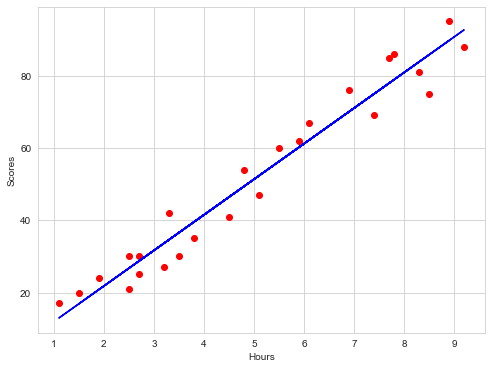

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, color='red')
plt.plot(X, y, color='blue')
plt.xlabel('Hours')
plt.ylabel('Scores')

#### Time to predict the score values using our model

In [14]:
y_pred = linear_regression.predict(x_test)

In [15]:
new_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index().drop('index', axis=1)
new_df

,Actual,Predicted
0,47,52.333576
1,20,16.895780
2,62,60.208642
3,42,34.614678
4,27,33.630295


#### Let's evaluate our model using Mean Absolute Error(MAE)

![alt-text](https://miro.medium.com/max/520/1*tu6FSDz_FhQbR3UHQIaZNg.png "Formula")
MAE is taking the sum of absolute value of error.

In [16]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.848954268442984


#### Let's predict the score of a student who has studied for 9.25 hours/day.

In [17]:
hour = [[9.25]]
pred_score = linear_regression.predict(hour)
print("Predicted Score: ",pred_score[0])

Predicted Score:  93.18548035389907
